Dataset Link - Click here
Problem - Here is the link of a dataset. Your task is to perform Data Preprocessing on this dataset, as mentioned below.
Tasks -

1. Print data info and data description
2. Handle missing values
3. Label Encoding
4. Feature Selection (drop unnecessary columns)
5. Feature Scaling (Is it required for this dataset or not? If not then give reason)

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os
from sklearn import preprocessing 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ajain09/Coursera/main/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

* Columns 'company'(24) and 'agent'(23) have a lot of null values, drop it. 
* Column 'children'(10) has a few null values, replace it. Same for column 'country'(13).
* Rest of the columns are alright.



In [ ]:
df.drop(columns=['company','agent'],inplace=True)

For the columns with numerical datatype, replace it with mean value, like for column 'children'.

0.1 is the mean of children.
Replace it with 0

In [ ]:
df['children'].fillna(0.0,inplace=True)

For column country, replace missing values with country with value unknown. 

In [ ]:
df['country'].fillna('UNK',inplace=True)

In [ ]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
CYM        1
KIR        1
DJI        1
LCA        1
BHS        1
Name: country, Length: 178, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
print(df['arrival_date_month'].value_counts())
months=['January','February','March','April','May','June','July','August','September','October','November','December']
num=[0,1,2,3,4,5,6,7,8,9,10,11]
#le.fit(months)
#df['arrival_date_month']=le.transform(df['arrival_date_month'])                      
df['arrival_date_month'].replace(months,num,inplace=True)
print(df['arrival_date_month'].value_counts())

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64
7     13877
6     12661
4     11791
9     11160
3     11089
5     10939
8     10508
2      9794
1      8068
10     6794
11     6780
0      5929
Name: arrival_date_month, dtype: int64


In [ ]:
le = preprocessing.LabelEncoder() 

In [ ]:
print(df['hotel'].value_counts())
df['hotel']=le.fit_transform(df['hotel'])                      # 1 for resort hotel, 0 for city hotel
print(df['hotel'].value_counts())

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
0    79330
1    40060
Name: hotel, dtype: int64


In [ ]:
print(df['meal'].value_counts())
df['meal']=le.fit_transform(df['meal'])                      #0-BB, 1-HB, 2-SC, 3-Undefined, 4-FB
print(df['meal'].value_counts())

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64
0    92310
2    14463
3    10650
4     1169
1      798
Name: meal, dtype: int64


In [ ]:
print(df['market_segment'].value_counts())
df['market_segment']=le.fit_transform(df['market_segment'])    
print(df['market_segment'].value_counts())

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64
6    56477
5    24219
4    19811
3    12606
2     5295
1      743
0      237
7        2
Name: market_segment, dtype: int64


In [ ]:
print(df['distribution_channel'].value_counts())
df['distribution_channel']=le.fit_transform(df['distribution_channel'])    
print(df['distribution_channel'].value_counts())

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64
3    97870
1    14645
0     6677
2      193
4        5
Name: distribution_channel, dtype: int64


In [ ]:
print(df['reserved_room_type'].value_counts())
df['reserved_room_type']=le.fit_transform(df['reserved_room_type'])    
print(df['reserved_room_type'].value_counts())

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64
0    85994
3    19201
4     6535
5     2897
6     2094
1     1118
2      932
7      601
9       12
8        6
Name: reserved_room_type, dtype: int64


In [ ]:
print(df['assigned_room_type'].value_counts())
df['assigned_room_type']=le.fit_transform(df['assigned_room_type'])    
print(df['assigned_room_type'].value_counts())

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64
0     74053
3     25322
4      7806
5      3751
6      2553
2      2375
1      2163
7       712
8       363
9       279
11       12
10        1
Name: assigned_room_type, dtype: int64


In [ ]:
print(df['deposit_type'].value_counts())
df['deposit_type']=le.fit_transform(df['deposit_type'])    
print(df['deposit_type'].value_counts())

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64
0    104641
1     14587
2       162
Name: deposit_type, dtype: int64


In [ ]:
print(df['customer_type'].value_counts())
df['customer_type']=le.fit_transform(df['customer_type'])    
print(df['customer_type'].value_counts())

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64
2    89613
3    25124
0     4076
1      577
Name: customer_type, dtype: int64


In [ ]:
print(df['reservation_status'].value_counts())
df['reservation_status']=le.fit_transform(df['reservation_status'])    
print(df['reservation_status'].value_counts())

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64
1    75166
0    43017
2     1207
Name: reservation_status, dtype: int64


FEATURE SELECTION

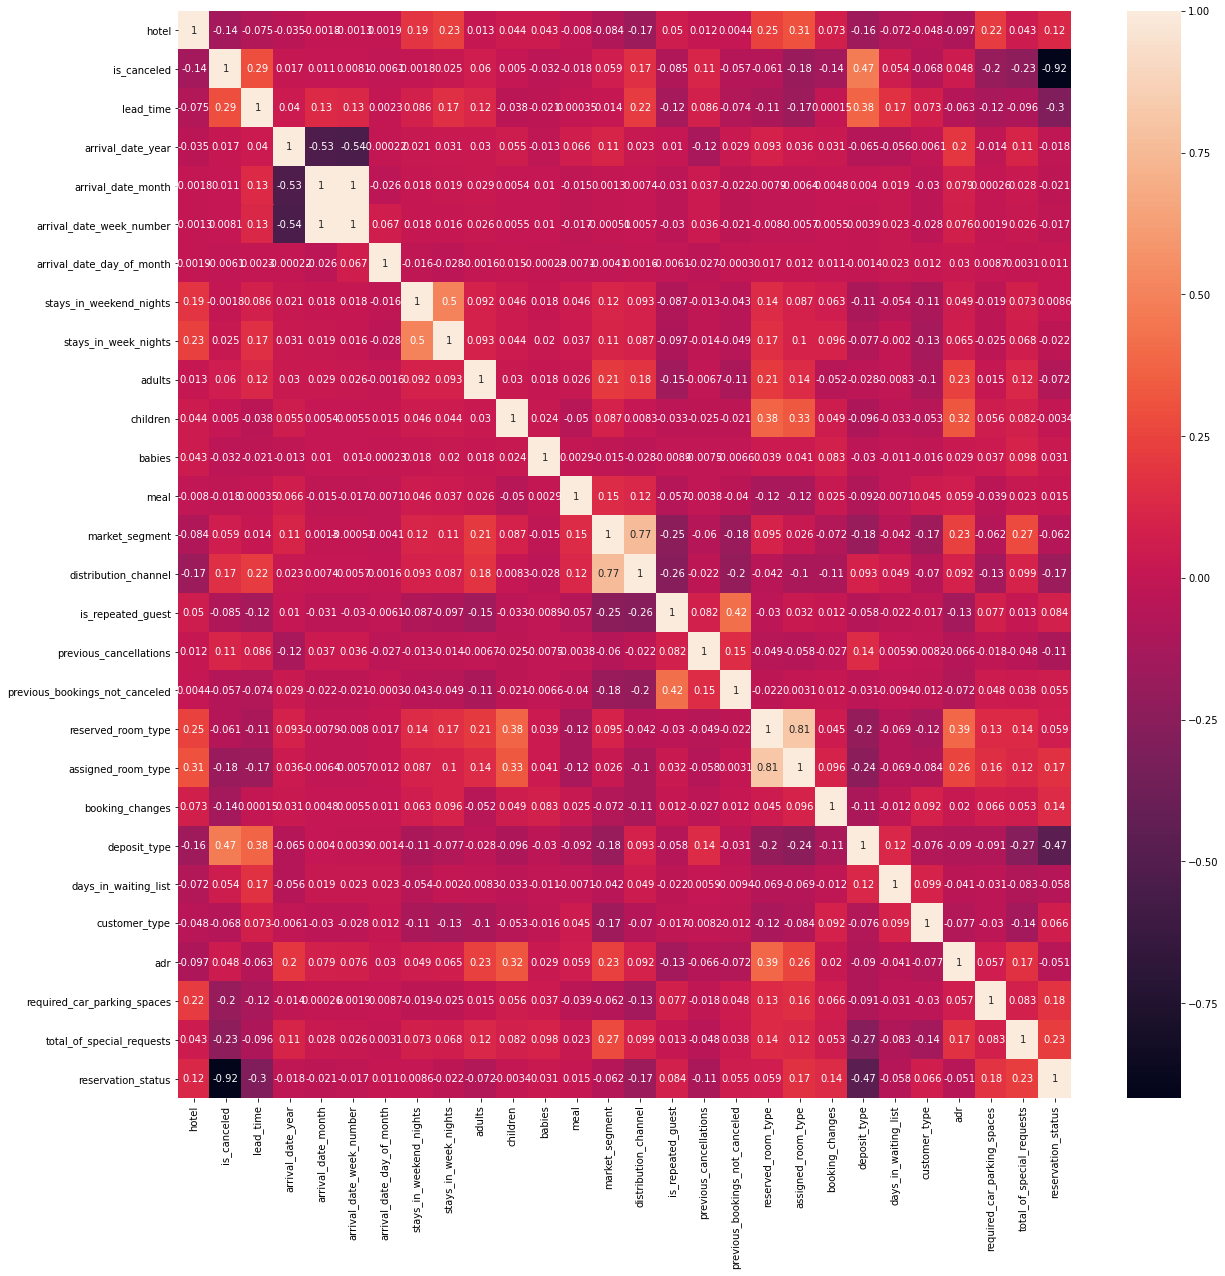

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.drop(columns=['country','reservation_status_date']).corr(),annot=True);

In [ ]:
X=df.drop(['country','reservation_status_date','is_canceled'],axis=1)
y=df['is_canceled']
print(X.shape)

(119390, 27)


In [ ]:
for i in X:
  data=df[['is_canceled',i]]
  correlation = data.corr(method='pearson')
  if(correlation.iloc[0,1]>0.9):
    X.drop(columns=[i],inplace=True)
print(X.columns,X.shape)    

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object') (119390, 27)


In [ ]:
pca=PCA()
cols=pca.fit_transform(X)
cols.shape

(119390, 27)

FEATURE SCALING

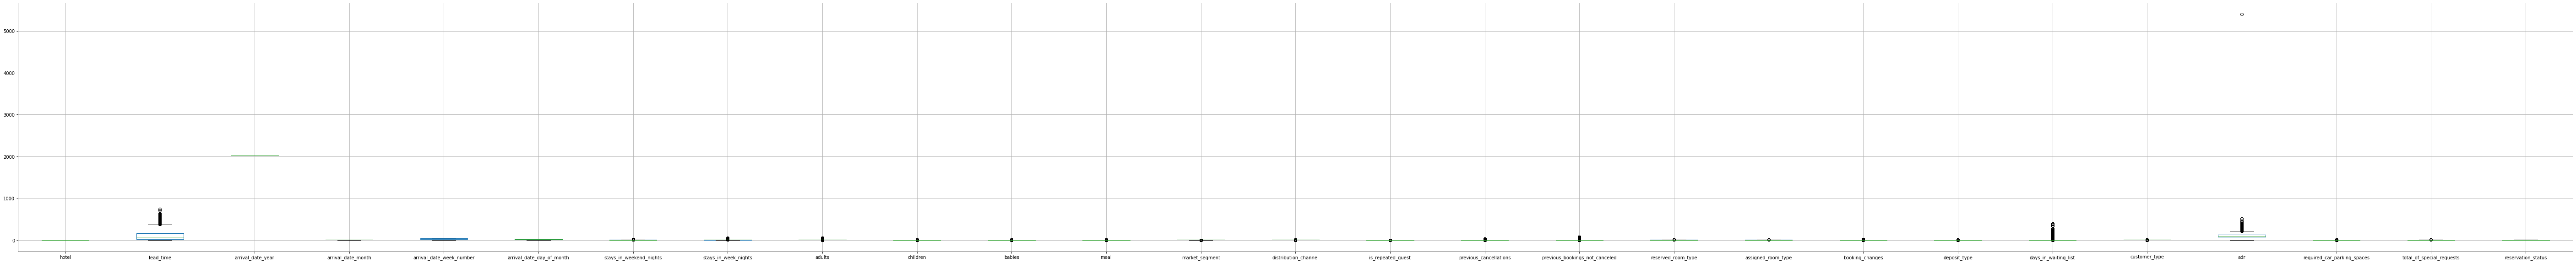

In [ ]:
cols = df.drop(['country','reservation_status_date','is_canceled'], axis=1)
fig, ax = plt.subplots(figsize=(100,10))       
cols.boxplot(ax=ax)

Since the range of values vary greatly and outliers are present, scaling is required

In [ ]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)